In [1]:
# Tabular Data
import pandas as pd
import numpy as np

# Display formatting
from IPython.display import Image
from IPython.display import display_html 

# Scalers and Models
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor

# .py files with custom functions
import wrangle
import explore
import modeling

# suppress warning notifications
import warnings
warnings.filterwarnings("ignore")

# Regression Project - Estimating Home Value

# Project Overview and Goals

<div class="alert alert-block alert-success">
<b><font size="+1">The purpose of this project is to create a Regression Model that predicts property tax assessed values of Single Family Properties that were sold in 2017 from a database of Zillow data  
<br><br>
    
    
Goal 1: Create a model that can predict the tax value better than the baseline rate
<br>
    Goal 2: Find the key drivers of tax value for single family properties<br>
    Goal 3: Identify where the properties are located

<hr style="border:10px solid purple">


# Acquire and Prepare Data

In [2]:
# customized function to acquire zillow data from Codeup database, eliminate outliers, and encode categorical data
train, validate, test = wrangle.wrangle_zillow()

In [4]:
train.head().T

,50660,14557,47007,26586,50383
parcelid,13016419,12331197,13939349,17209964,14411957
bathrooms,2.0,2.0,3.0,2.0,2.5
bedrooms,4.0,3.0,4.0,3.0,3.0
sqft,1444.0,1545.0,2286.0,1431.0,1463.0
county,Los Angeles,Los Angeles,Orange,Ventura,Orange
fireplacecnt,0.0,0.0,0.0,1.0,0.0
garagecarcnt,0.0,0.0,2.0,2.0,2.0
lotsize,7490.0,8807.0,8400.0,11100.0,4400.0
poolcnt,1.0,0.0,0.0,0.0,0.0
lat,34.148374,33.952336,33.775387,34.213986,33.520144


<div class="alert alert-block alert-success"><b><font size="+1">
Takeaways from Acquire:<br>
-  Removed outliers, columns with too many null values<br>
-  43,182 entries with no missing/Null values<br>
-  Categorical columns have been encoded<br>
-  Numerical columns will be scaled before modeling<br>
-  Binary encoded columns for whether the house has a pool, what county it is in, and a couple of special features
    

<hr style="border:10px solid purple">


# Data Exploration

### What is FIPS?

#### Federal Information Processing System codes are numbers which uniquely identify geographic areas.

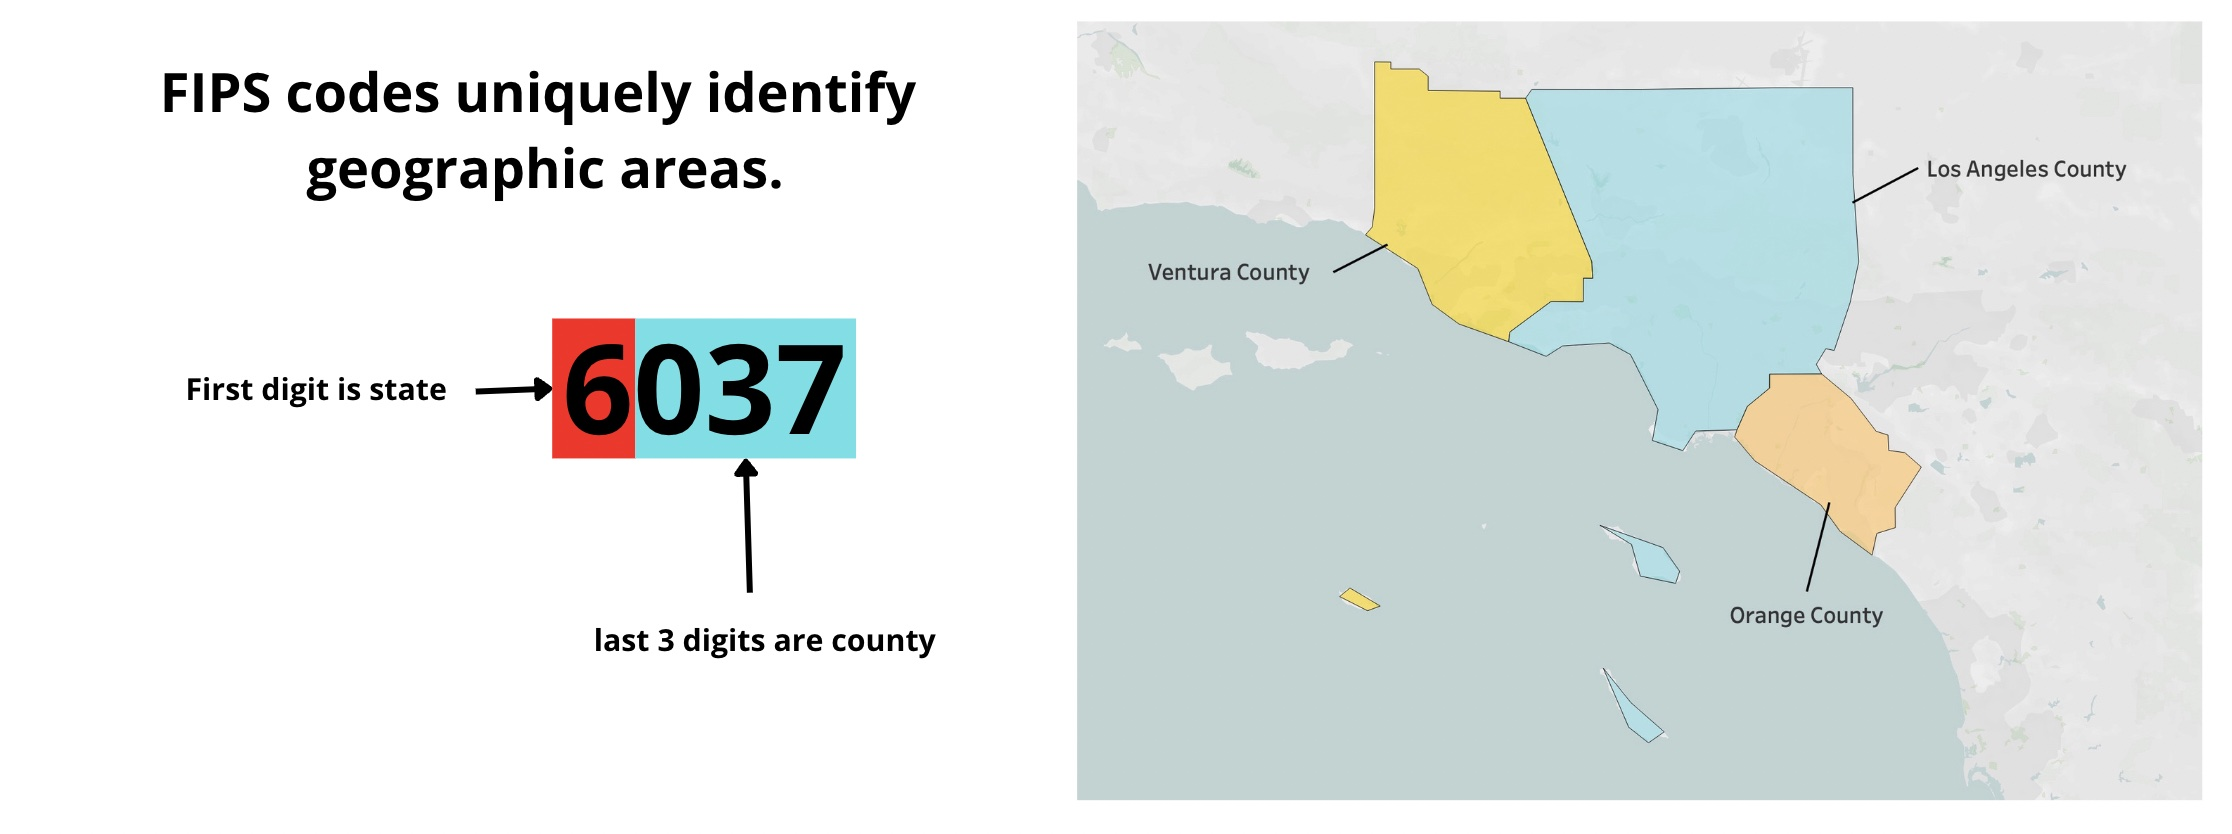

## What does our target variable look like?  In each County?

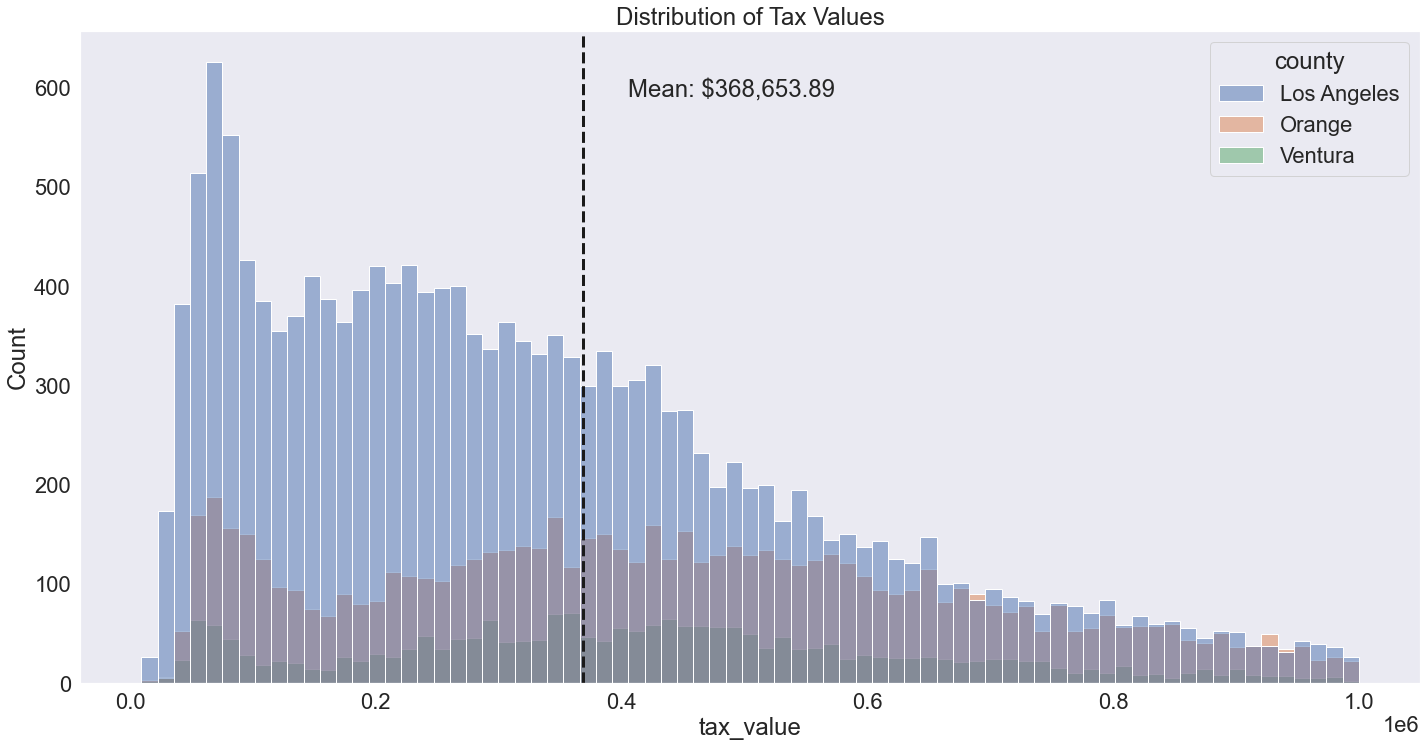

In [5]:
# test target variable distribution plot
explore.target_dist(train)

### H0: tax value means of the properties in three counties (Los Angeles, Ventura, and Orange) are all equal.

### Ha: tax value means of the properties in three counties (Los Angeles, Ventura, and Orange) are NOT all equal

In [6]:
# perform ANOVA from explore module
explore.county_ANOVA(train)

We reject the Null Hypothesis


<div class="alert alert-block alert-warning">


Tax Value Exploration takeaways:<br>
- Mean Tax Values are higher in Los Angeles County, folowed by Orange County<br>
- Analysis of Variance test confirms that county is significant

## Location, Location, Location

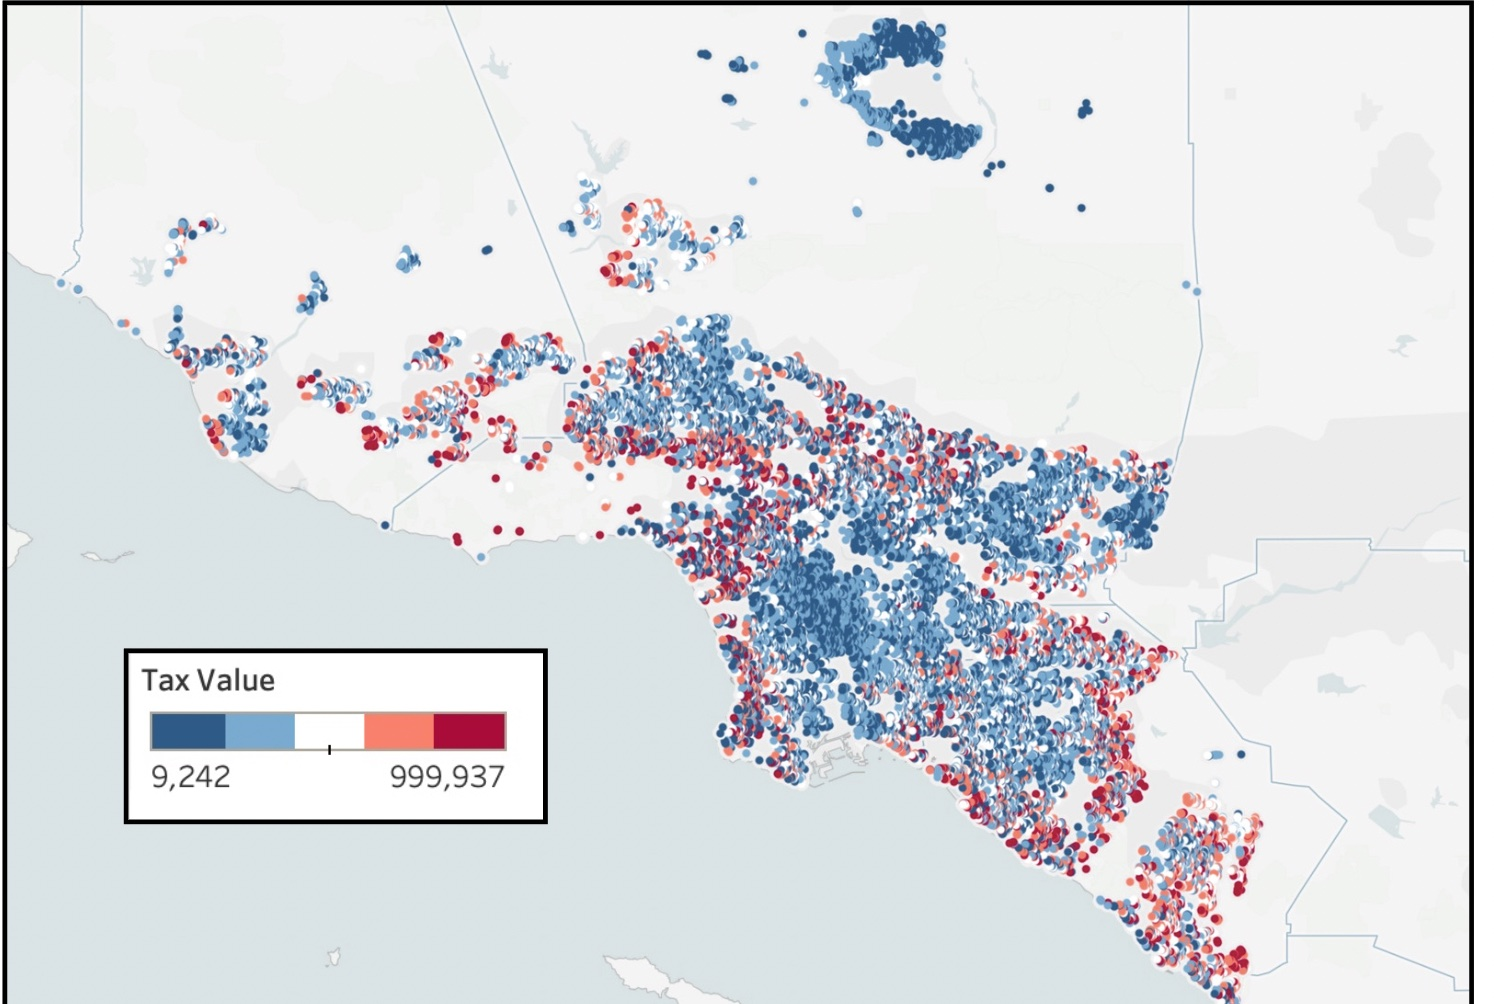

### Clusters of more expensive houses within counties.  Use census tract as a feature for more granular location data

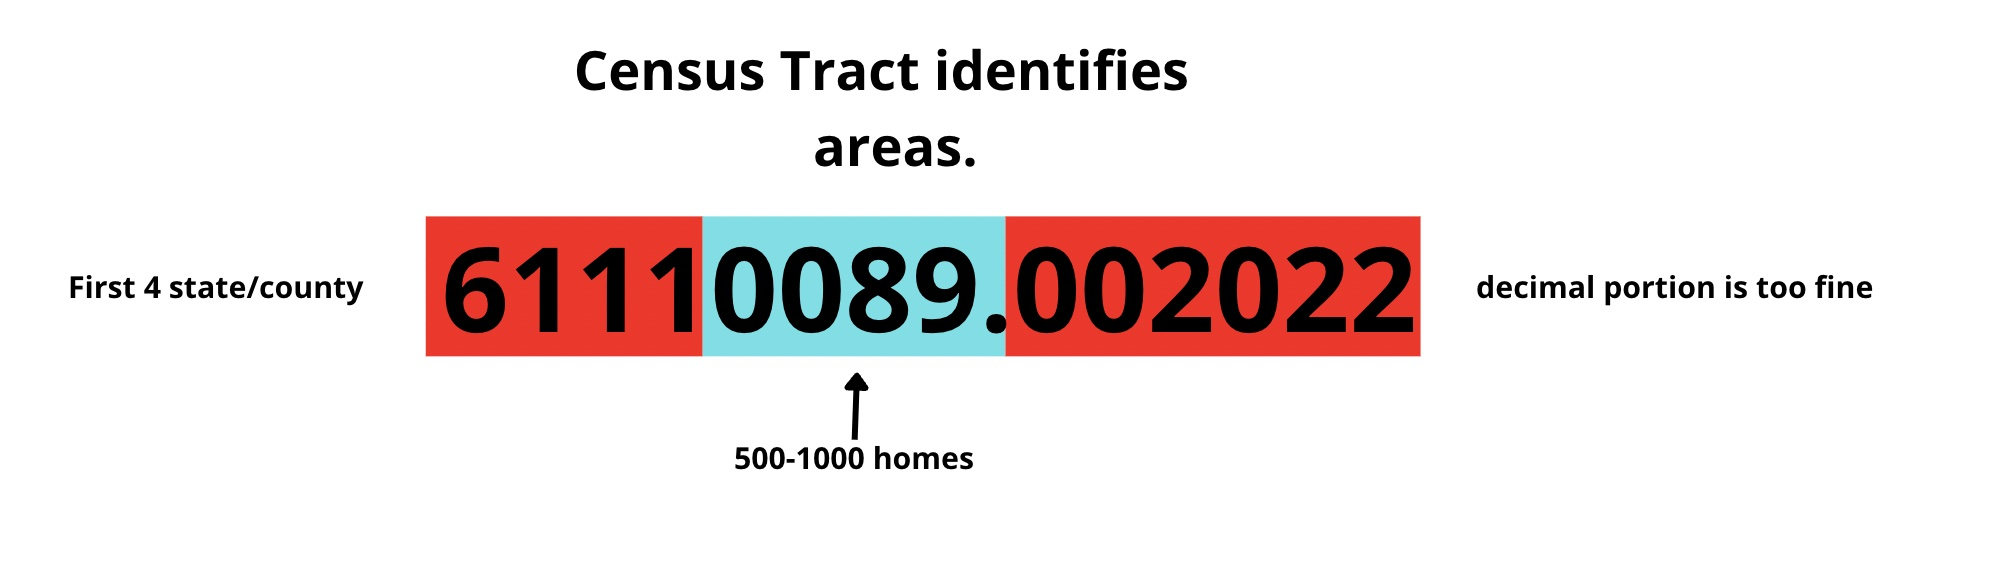

## What columns correlate to Tax Value?

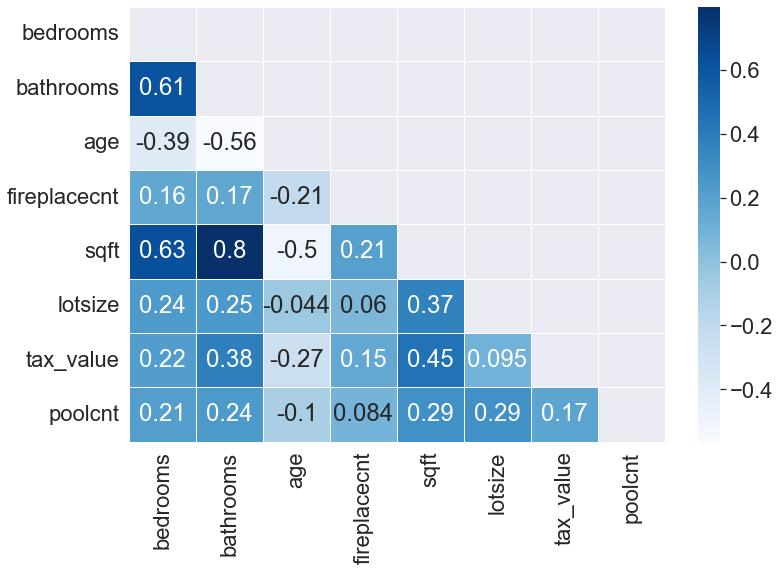

In [7]:
# create correlation plit from explore.py
explore.corr_plot(train)

<div class="alert alert-block alert-warning">


Correlation Takeaways:<br>
- Square Footage had a strong positive correlation to Value
- Age had a strong negative corellation
- Number of bathrooms and bedrooms is heavily correlated to square footage


## Lets further explore bathrooms

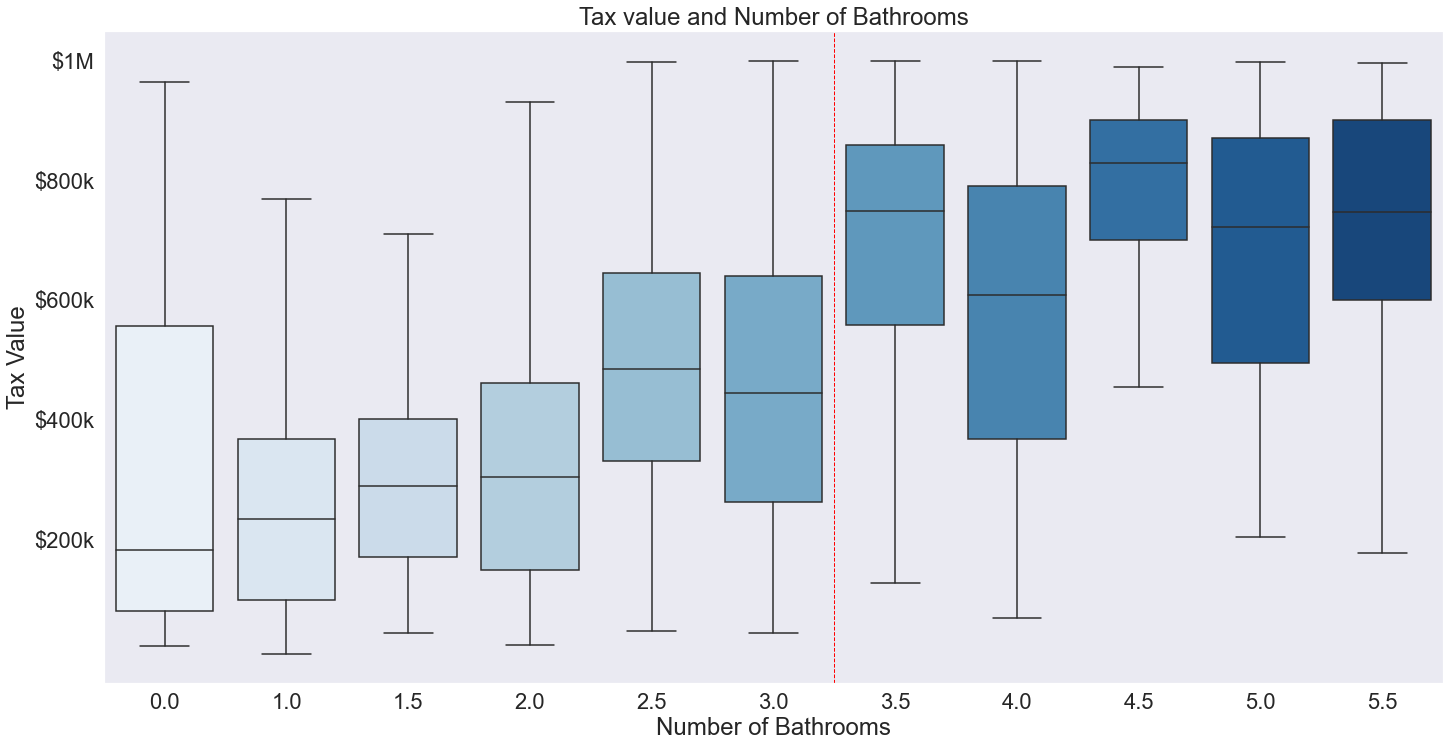

In [8]:
# create boxplot from explore.py
explore.bath_plot(train)

## Created a categorical attribute for more than 3 bathrooms.  Does having a lot of bathrooms significantly correlate to Tax Value?

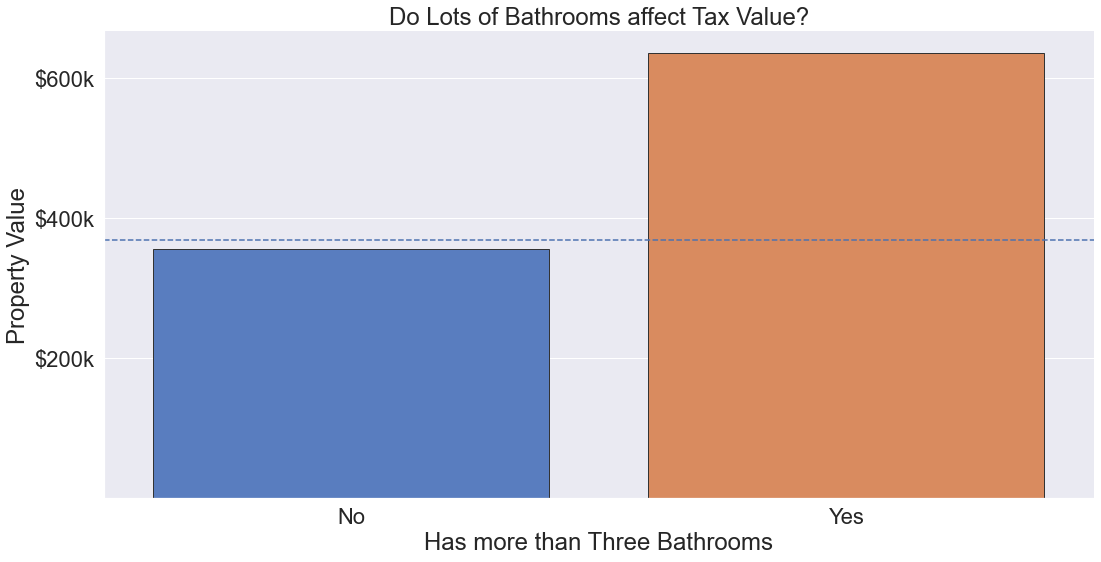

Average property value of properties with more than three bathrooms $636,297
Average property value of properties with less than three bathrooms $356,120



In [9]:
# create plot from explore.py
explore.manybath_plot(train)

### H0: Mean tax value of properties with more than 3 bathrooms is equal to those with 3 or less bathrooms 

### Ha: Mean tax value of properties with more than 3 bathrooms is not equal to those with 3 or less bathrooms

In [10]:
# Perform Independent T-Test: 2 samples, normal distribution, test variance
explore.manybath_test(train)

We reject the null hypothesis.


<div class="alert alert-block alert-warning">


Bathroom Takeaways:<br>
- Bathrooms heavily correlated with square footage, and we don't want the model to overvalue
- But our new category will capture the homes above 3 Baths that have higher values
- Similar trend with large garages, so used the same process there
- Bedrooms were split into categorical columns


<div class="alert alert-block alert-success"><b><font size="+1">

# Takeaways from Data Exploration

- Location is very important for tax value
- Square footage is highly correlated to tax value
- Some columns such as bathrooms and bedrooms are highly correlated to square footage, so used a categorical variable to cature effect

<hr style="border:10px solid purple">


# Model and Evaluate

In [11]:
# create 3 models
OLS = LinearRegression(normalize=True)
LassoLars = LassoLars(alpha=1)
GLM = TweedieRegressor(power=1, alpha=0)

### Baseline Accuracy

In [12]:
# get baseline results from modeling.py file and display results table
results = modeling.predict_baseline(train)

,model,RMSE_train,RMSE_validate,R2
0,Mean,"$233,115.06",N/A,N/A
1,Median,"$235,121.87",N/A,N/A


<div class="alert alert-block alert-warning">

### Using the Mean, the baseline RMSE will be $233,115.06


In [13]:
# identify features for modeling
features = ['sqft', 'lotsize', 'poolcnt', 'lat',
            'long', 'tract', 'Los Angeles', 'Orange', 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
             7.0, 8.0, 9.0, 10.0, 11.0, 'age', '4plusBath', '3to5garage']

In [14]:
# create X and y sets
X_train = train[features]
y_train = train['tax_value']

X_validate = validate[features]
y_validate = validate['tax_value']

X_test = test[features]
y_test = test['tax_value']

# scale X 
scaler = MinMaxScaler()
X_train[features] = scaler.fit_transform(X_train[features])
X_validate[features] = scaler.transform(X_validate[features])
X_test[features] = scaler.transform(X_test[features])

## Linear Regression (OLS)

In [15]:
# send the OLS model to a function in the modeling.py file and append values to results table
newresult = modeling.LRmodel(OLS, X_train, y_train, X_validate, y_validate)
results.loc[len(results)] = newresult

## LassoLars

In [16]:
# send the LassoLars model to a function in the modeling.py file and append values to results table
newresult = modeling.LRmodel(LassoLars, X_train, y_train, X_validate, y_validate)
results.loc[len(results)] = newresult

## Tweedie Regressor (GLM)

In [17]:
# send the GLM model to a function in the modeling.py file, append values to results table, and display
newresult = modeling.LRmodel(GLM, X_train, y_train, X_validate, y_validate)

results.loc[len(results)] = newresult
df_style = results.style.set_table_attributes("style='display:inline; margin-right:100px;'").set_caption("RESULTS")
display_html(df_style._repr_html_(), raw=True)

,model,RMSE_train,RMSE_validate,R2
0,Mean,"$233,115.06",N/A,N/A
1,Median,"$235,121.87",N/A,N/A
2,LinearRegression(normalize=True),"$198,418.25","$199,021.70",0.281600
3,LassoLars(alpha=1),"$198,424.85","$199,017.21",0.281600
4,"TweedieRegressor(alpha=0, power=1)","$198,944.70","$199,738.47",0.276400


<div class="alert alert-block alert-warning"><b><font size="+1">


** Model Comparison **

- All three models had similar RMSE for training and validate sets, with values ranging from $198-200k<br>
- Overall R2 scores also had similar values accross the three models<br>

- I chose the LassoLars model because it had a slightly smaller spread between train & validate scores
    - it also was the most consistent performing model when performing feature evaluation


<hr style="border:10px solid purple">


# Testing the  Best Model

- Now testing the Logistic Regression model against our test data

In [18]:
# send the test set to the function in the modeling.py file.  The model will be retrained on the original train data
newresult = modeling.LRmodel(LassoLars, X_train, y_train, X_test, y_test)
print('On Test Data:  RMSE:', newresult[2])
print('                 R2:', newresult[3])


On Test Data:  RMSE: $198,604.47
                 R2: 0.278


<div class="alert alert-block alert-success"><b><font size="+1">

## Testing Takeaways 
### RMS Error of \\$198,604.47 on Out of Sample data, beat baseline by ~$35,000

- After testing three models they all had similar RMSE and R2
    
- Performance on the test data was consistent with validation data performance
    
- Location fields were the most significant features impacting the model


<hr style="border:10px solid purple">



# Conclusions and Next Steps

- We created a tax value predictor that beat the baseline by \\$35,000

- The model performed significantly better when the dataset was restricted to a more narrow set of data

- Location was the largest driver of tax value, followed by square footage



- I attempted to create a function that created a dictionary of models trained for each of the most popular FIPS
    - Combining results and evaluating proved too difficult to implement in the time given
